In [1]:
# Imports
import pandas as pd
df = pd.read_csv(r"C:\Users\zacha\神州\data\csv\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
# Rename
df.rename({'salary_more_then_100k':'salary_more_than_100k'},axis=1,inplace=True)

In [9]:
# Inputs and Outputs
x = df.drop('salary_more_than_100k',axis='columns')
y = df['salary_more_than_100k']

In [12]:
# Encode Columns
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [26]:
#Label Dictionary 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(x['company'])
company_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(company_dict)

le.fit(x['job'])
job_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(job_dict)

le.fit(x['degree'])
degree_dict = dict(zip(le.classes_, le.transform(le.classes_)))
print(degree_dict)

{'abc pharma': 0, 'facebook': 1, 'google': 2}
{'business manager': 0, 'computer programmer': 1, 'sales executive': 2}
{'bachelors': 0, 'masters': 1}


In [13]:
# Encode Labels
x['company_n'] = le_company.fit_transform(x['company'])
x['job_n'] = le_company.fit_transform(x['job'])
x['degree_n'] = le_company.fit_transform(x['degree'])
x.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [14]:
# Encoded DataFrame
le_x = x.drop(['company','job','degree'],axis='columns')
le_x

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
# Create Model
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [17]:
# Fit Model
model.fit(le_x,y)

DecisionTreeClassifier()

In [18]:
model.score(le_x,y)

1.0

In [20]:
model.predict([[2,2,1]])

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

[Text(0.4166666666666667, 0.9166666666666666, 'X[0] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.25, 0.75, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5833333333333334, 0.75, 'X[0] <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.5833333333333334, 'X[1] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5833333333333334, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.4166666666666667, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Tex

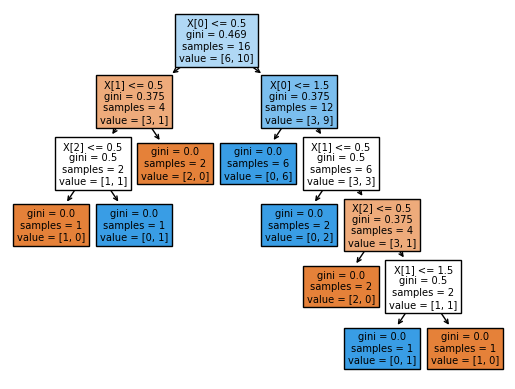

In [36]:
tree.plot_tree(model,filled=True)